Natural Lagnguage Processing Challenge
=================================================

In [1]:
# Load necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Checking and Understanding Datesets

In [2]:
# Load the ordinary dataset
new_data = pd.read_csv('data.csv')
valided_data = pd.read_csv('validation_data.csv')

# Display the first few rows of the dataset
new_data.head()






,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
new_data.keys()

Index(['label', 'title', 'text', 'subject', 'date'], dtype='object')

In [4]:

# Displaying the first few rows of the validated dataset

valided_data.head(5)

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"


In [5]:
# the info of the dataset

new_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [6]:
# Checking for missing NAN
new_data.isnull().sum()

label      0
title      0
text       0
subject    0
date       0
dtype: int64

The Section Processing the Text for Machine Understanding

In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
new_data.head()


,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
print(new_data.head())

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [10]:
# importing all the necessary libraries for this project

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
# Loading the training data
data = pd.read_csv("data.csv")

In [12]:
# Initializinig lemmatizer and stop words with fallback
lemmatizer = WordNetLemmatizer()
try:
    stop_words = set(stopwords.words('english')) if _have_stopwords else set()
except Exception:
    stop_words = set()
# this code initializes a lemmatizer and a set of stop words,
# with a fallback to an empty set if there's an issue loading the stop words. 
# This ensures that the code can continue running even if the stop words can't be loaded.


In [13]:

# The Pro- reprocessing pf function I wast remove the symbols but keep the numbers
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    # Removes symbols but keep numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    # Removes stopwords & lemmatize
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

In [14]:
print(data.head(5))

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [15]:
# Making  sure the required columns exist
required_cols = {'label','title','text'}
missing = required_cols - set(data.columns)
if missing:
    raise ValueError(f"Missing columns in data.csv: {missing}")


In [16]:
# Apply pre-processing ONLY to title and text, as requested
cols_to_clean = ['title', 'text']



In [17]:
print(data.head(5))

   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [18]:
#  apply per column
for c in cols_to_clean:
    data[c] = data[c].fillna("").astype(str).apply(preprocess_text)

In [19]:
# creating feature column: title + text
data['clean_text'] = (data['title'] + " " + data['text']).str.strip()

In [20]:
print(data.head(10))

   label                                              title  \
0      1  a u budget fight loom republican flip their fi...   
1      1  u military to accept transgender recruit on mo...   
2      1  senior u republican senator let mr mueller do ...   
3      1  fbi russia probe helped by australian diplomat...   
4      1  trump want postal service to charge much more ...   
5      1  white house congress prepare for talk on spend...   
6      1  trump say russia probe will be fair but timeli...   
7      1  factbox trump on twitter dec 29 approval ratin...   
8      1             trump on twitter dec 28 global warming   
9      1  alabama official to certify senatorelect jones...   

                                                text       subject  \
0  washington reuters the head of a conservative ...  politicsNews   
1  washington reuters transgender people will be ...  politicsNews   
2  washington reuters the special counsel investi...  politicsNews   
3  washington reuters trum

In [21]:
# --- Step 6: Train/test split
X = data['clean_text']
y = data['label'].astype(int)  # ensure int labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Vectorize (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams+bigrams often help
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

In [23]:
# --- Step 8: Train classifier
model = LogisticRegression(max_iter=2000, n_jobs=None)  # bump max_iter for convergence
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=2000)

In [24]:
# --- Step 9: Evaluate
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
from joblib import dump
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


dump(model, "logisticregresionl.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")





Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0      0.989     0.986     0.987      3989
           1      0.986     0.989     0.988      4000

    accuracy                          0.987      7989
   macro avg      0.987     0.987     0.987      7989
weighted avg      0.987     0.987     0.987      7989


Confusion Matrix:
 [[3932   57]
 [  43 3957]]


['tfidf_vectorizer.joblib']

In [ ]:
# Train SGDClassifier
# loss="log_loss" → logistic regression
# loss="hinge" → linear SVM

from sklearn.linear_model import SGDClassifier

model = SGDClassifier(
    loss="log_loss",       # logistic regression
    penalty="l2",          # regularization
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_vec, y_train)


# Evaluate

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


# Save model & vectorizer

dump(model, "sgd_classifier_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")

Accuracy: 0.9817

Classification Report:
               precision    recall  f1-score   support

           0      0.985     0.978     0.982      3989
           1      0.979     0.985     0.982      4000

    accuracy                          0.982      7989
   macro avg      0.982     0.982     0.982      7989
weighted avg      0.982     0.982     0.982      7989


Confusion Matrix:
 [[3903   86]
 [  60 3940]]


['tfidf_vectorizer.joblib']

In [31]:

# Using  (SVM)


# This is for saving  models for later
from joblib import dump


# Loading the data the data gaga




# Stopwords & Lemmatizer

lemmatizer = WordNetLemmatizer()

def load_stopwords():
    try:
        # Trying to ensure the corpus exists; ignore if already present
        nltk.download("stopwords", quiet=True)
        return set(stopwords.words("english"))
    except Exception:
        # Fallback: empty set if NLTK stopwords can’t load
        return set()

stop_words = load_stopwords()


# Preprocessing
# - remove symbols but keep numbers
# - lowercase
# - remove stopwords
# - lemmatize

def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # this keeps letters, digits, spaces
    text = text.lower()
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Ensuring am only using the required columns i want title and text for context
required_cols = {"label", "title", "text"}
missing = required_cols - set(data.columns)
if missing:
    raise ValueError(f"Missing columns in data.csv: {missing}")

# I cleaned only title and text becasue I only focus of context
for c in ["title", "text"]:
    data[c] = data[c].fillna("").astype(str).apply(preprocess_text)

# Combineing the cleaned into one feature column
data["clean_text"] = (data["title"] + " " + data["text"]).str.strip()


# Train Test and split

X = data["clean_text"]
y = data["label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


# Vectorize using TF-IDF

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)


# Training using  another classifier LinearSVC (SVM)

model = LinearSVC()  # the model
model.fit(X_train_vec, y_train)


# Evaluating the meodle

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


# finally saving the model 

dump(model, "svm_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")




c:\Users\Sadiq\OneDrive\Documents\anaconda3\envs\iron_hack_2\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.9949

Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.995     0.995      3989
           1      0.995     0.995     0.995      4000

    accuracy                          0.995      7989
   macro avg      0.995     0.995     0.995      7989
weighted avg      0.995     0.995     0.995      7989


Confusion Matrix:
 [[3969   20]
 [  21 3979]]


['tfidf_vectorizer.joblib']

In [38]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from joblib import load

# Load saved model and vectorizer
model = load("svm_model.joblib")
vectorizer = load("tfidf_vectorizer.joblib")


# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Define the same preprocessing function
def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # keep alphanumeric and space
    text = text.lower()
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Load validation data
val_data = pd.read_csv("validation_data.csv")

# Preprocess title and text columns
for col in ["title", "text"]:
    val_data[col] = val_data[col].fillna("").astype(str).apply(preprocess_text)

# Combine into one input feature
val_data["clean_text"] = (val_data["title"] + " " + val_data["text"]).str.strip()

# Vectorize using loaded vectorizer
X_val_vec = vectorizer.transform(val_data["clean_text"])

# Predict labels (0 or 1)
predictions = model.predict(X_val_vec)

# Replace label column with predicted labels
val_data["label"] = predictions

# Ensure required output format
expected_cols = ["label", "title", "text", "subject", "date"]
if not set(expected_cols).issubset(val_data.columns):
    raise ValueError(f"Missing expected columns: {set(expected_cols) - set(val_data.columns)}")

# Save output with original format
val_data[expected_cols].to_csv("predicted_validation_data.csv", index=False)
print("✅ Predictions saved to predicted_validation_data.csv")


✅ Predictions saved to predicted_validation_data.csv


In [32]:

# Natural Lagnguage Processing Challenge (Complement Naive Bayes)


import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from joblib import dump


# Load data again 

data = pd.read_csv("data.csv")


# Stopwords & Lemmatizer

lemmatizer = WordNetLemmatizer()

def load_stopwords():
    try:
        nltk.download("stopwords", quiet=True)
        return set(stopwords.words("english"))
    except Exception:
        return set()

stop_words = load_stopwords()


# Preprocessing

def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # keep letters, digits, spaces
    text = text.lower()
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Ensure required columns
required_cols = {"label", "title", "text"}
missing = required_cols - set(data.columns)
if missing:
    raise ValueError(f"Missing columns in data.csv: {missing}")

# Clean title and text
for c in ["title", "text"]:
    data[c] = data[c].fillna("").astype(str).apply(preprocess_text)

# Combine into one column
data["clean_text"] = (data["title"] + " " + data["text"]).str.strip()


# Train/Test split

X = data["clean_text"]
y = data["label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


# TF-IDF Vectorization

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Train with ComplementNB

model = ComplementNB()
model.fit(X_train_vec, y_train)

# Evaluate

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


# Save model & vectorizer

dump(model, "complement_nb_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")


Accuracy: 0.9415

Classification Report:
               precision    recall  f1-score   support

           0      0.943     0.940     0.941      3989
           1      0.940     0.943     0.942      4000

    accuracy                          0.942      7989
   macro avg      0.942     0.942     0.942      7989
weighted avg      0.942     0.942     0.942      7989


Confusion Matrix:
 [[3749  240]
 [ 227 3773]]


['tfidf_vectorizer.joblib']

In [33]:

#  (Random Forest)


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from joblib import dump


# Load dataset

data = pd.read_csv("data.csv")

# Stopwords & Lemmatizer

lemmatizer = WordNetLemmatizer()

def load_stopwords():
    try:
        nltk.download("stopwords", quiet=True)
        return set(stopwords.words("english"))
    except Exception:
        return set()

stop_words = load_stopwords()


# Preprocessing

def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # keep letters, numbers, spaces
    text = text.lower()
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Ensure required columns exist
required_cols = {"label", "title", "text"}
missing = required_cols - set(data.columns)
if missing:
    raise ValueError(f"Missing columns in data.csv: {missing}")

# Clean title and text
for col in ["title", "text"]:
    data[col] = data[col].fillna("").astype(str).apply(preprocess_text)

# Combine into one text column
data["clean_text"] = (data["title"] + " " + data["text"]).str.strip()


# Train/Test split

X = data["clean_text"]
y = data["label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)




In [34]:

# (SGDClassifier)


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from joblib import dump


# Load dataset again

data = pd.read_csv("data.csv")


# Stopwords & Lemmatizer

lemmatizer = WordNetLemmatizer()

def load_stopwords():
    try:
        nltk.download("stopwords", quiet=True)
        return set(stopwords.words("english"))
    except Exception:
        return set()

stop_words = load_stopwords()


# Preprocessing

def preprocess_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # keep letters, numbers, spaces
    text = text.lower()
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

# Ensure required columns exist
required_cols = {"label", "title", "text"}
missing = required_cols - set(data.columns)
if missing:
    raise ValueError(f"Missing columns in data.csv: {missing}")

# Clean title and text
for col in ["title", "text"]:
    data[col] = data[col].fillna("").astype(str).apply(preprocess_text)

# Combine into one text column
data["clean_text"] = (data["title"] + " " + data["text"]).str.strip()


# Train/Test split

X = data["clean_text"]
y = data["label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


# TF-IDF Vectorization

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Train SGDClassifier
# loss="log_loss" → logistic regression
# loss="hinge" → linear SVM

model = SGDClassifier(
    loss="log_loss",       # logistic regression
    penalty="l2",          # regularization
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_vec, y_train)


# Evaluate

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=3)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)


# Save model & vectorizer

dump(model, "sgd_classifier_model.joblib")
dump(vectorizer, "tfidf_vectorizer.joblib")


Accuracy: 0.9817

Classification Report:
               precision    recall  f1-score   support

           0      0.985     0.978     0.982      3989
           1      0.979     0.985     0.982      4000

    accuracy                          0.982      7989
   macro avg      0.982     0.982     0.982      7989
weighted avg      0.982     0.982     0.982      7989


Confusion Matrix:
 [[3903   86]
 [  60 3940]]


['tfidf_vectorizer.joblib']

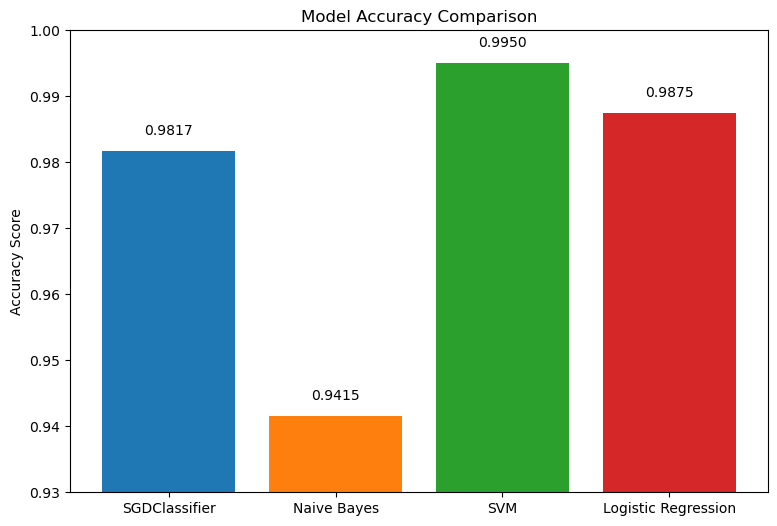

In [35]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ["SGDClassifier", "Naive Bayes", "SVM", "Logistic Regression" ]
accuracies = [0.9817, 0.9415, 0.995, 0.9875  ]

# Create bar plot
plt.figure(figsize=(9, 6))
bars = plt.bar(models, accuracies, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728" ])

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f"{acc:.4f}", ha='center', va='bottom', fontsize=10)

# Labels and title
plt.ylim(0.93, 1.0)  # focus on the high accuracy range
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")

plt.show()
